# Communicate Data Findings Project - Ford Go-Bike 
## by Sony Okpara


## Investigation Overview

My focus in this explanatory presentation is to answer some important questions about the various bike trips made by users of  Ford Go-Bike hiring system. The main focus is on how trip attributes such as duration, user type, age and weekday influence the patronage of the system.


## Dataset Overview

The data originally contained approximately 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. Attributes of each trip data included duration in sec, start time, end time, member birth year, user type, among others. A total of 8,652 data points were removed from the analysis due to some missing values and unrealistic member birth years. Hence 174,760 trip records was used in this work.


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata-cleaned.csv')
df.head()

,duration_sec,duration_min,start_time,start_time_weekday,start_time_hour,end_time,end_time_hour,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
0,52185,869,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,8,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,35,Male,No
1,61854,1030,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,5,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,47,Male,No
2,36490,608,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,4,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,30,Other,No
3,1585,26,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,0,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,45,Male,Yes
4,1793,29,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,0,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,60,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Age 

Members age in dataset take on a range of values from 18 years minimum to 80 years maximum. The histogram of the distribution is skewed to the left and unimodal suggesting that majority of trips were made by yourger users. From the chart most trips were made by users of age range 25 and 30 years. 


In [3]:
def displayChartLabels(title, xlabel, ylabel):
    """Display chart title, x and y labels"""
    plt.title(title, fontweight='bold', fontsize=14, y=1.05)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.show()

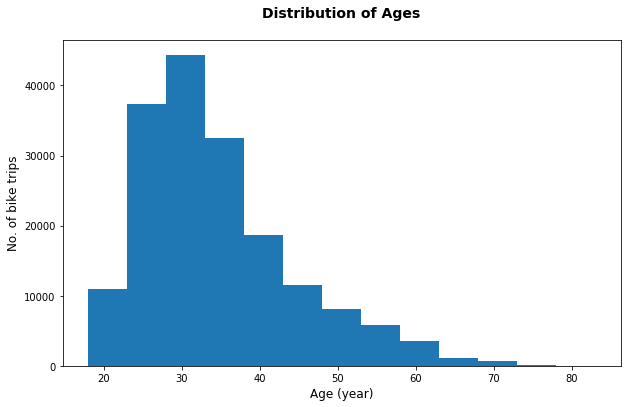

In [4]:
# histogram showing age distribution
plt.figure(figsize = [10, 6])
bin_edges = np.arange(df['member_age'].min(), df['member_age'].max()+5, 5)
plt.hist(data = df, x = 'member_age', bins = bin_edges)
displayChartLabels(title='Distribution of Ages', xlabel='Age (year)', ylabel='No. of bike trips')

## Distribution of User Type

The system has two main type of users: *Subscriber* and *Customer*. The distribution shows that subscribers are the dorminant type of users of the bike hiring system recording over 90% of total trips. Customers seldomly use make use of the system recording barely 10% of total trips in February 2019.


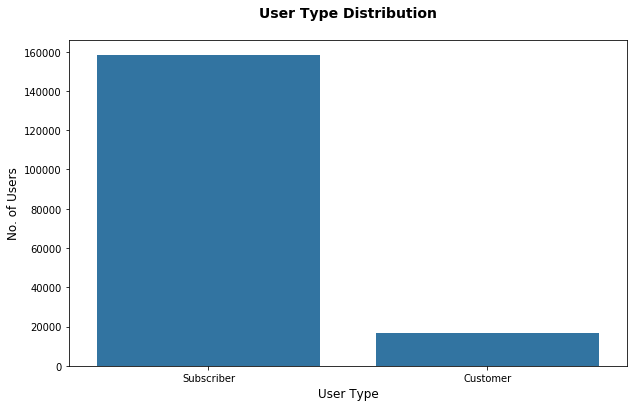

In [5]:
# bar chart showing user type distribution
plt.figure(figsize = [10, 6])
sorted_counts = df['user_type'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color, order = sorted_counts.index)
displayChartLabels(title='User Type Distribution', xlabel='User Type', ylabel='No. of Users')

## Distribution of Start Time Weekdays

According to the distribution, Thursdays recorded the highest bike trips. Trips marginally decrease on Wednesdays relative to Thursdays. Tuesdays recorded marignal rise in bike trips than Wednesdays, whereas Mondays recorded lesser trips than Wednesdays and Fridays. Saturdays and Sundays recorded almost the same number of bike trips. The decrease order of bike trips in weekdays is: Thursday, Tuesday, Wednesday, Friday, Monday, Sunday, Saturday.

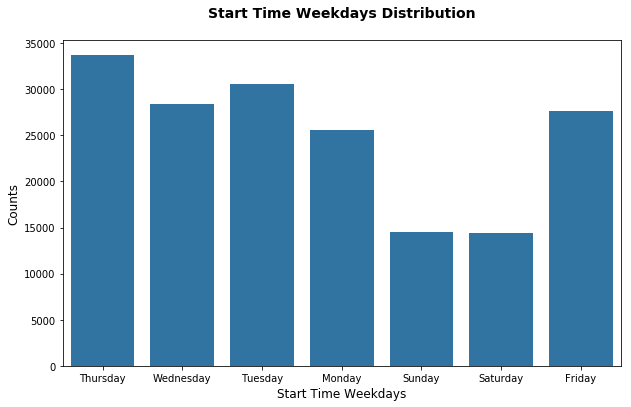

In [7]:
# bar chart showing the distribution of weekdays
plt.figure(figsize = [10,6])
sorted_counts = df['start_time_weekday'].value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_time_weekday', color = base_color)
displayChartLabels(title='Start Time Weekdays Distribution', xlabel='Start Time Weekdays', ylabel='Counts')

## Age vs. Duration by User Type

Generally, majority of users, regardless of their age, spend far less than 200 minutes per trip. It can be seen that the average age of subscribers is higher than that of customers and they spent shorter trip durations than customers.

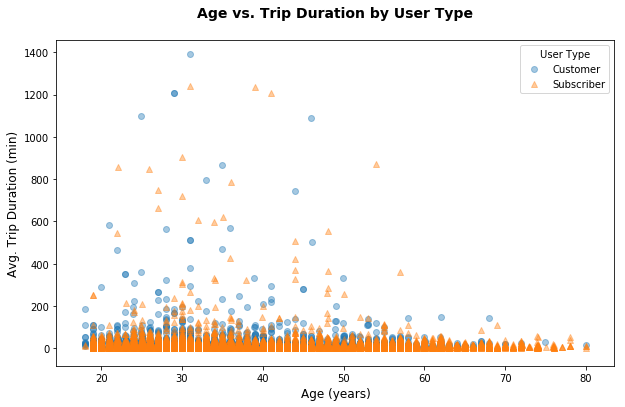

In [8]:
# scatter plot for age, trip duration and user type
plt.figure(figsize = [10, 6])
sample = np.random.choice(df.shape[0], 50000, replace=False)
df_sub = df.loc[sample]
user_type_markers = [['Customer', 'o'], ['Subscriber', '^']]

for user_type, marker in user_type_markers:
    plot_data = df_sub.loc[df_sub['user_type'] == user_type]
    sb.regplot(data = plot_data, 
               x = 'member_age', 
               y = 'duration_min', 
               x_jitter = 0.04, 
               marker = marker, 
               fit_reg = False, 
               scatter_kws = {'alpha':0.4})

plt.legend(['Customer', 'Subscriber'], title = 'User Type');
displayChartLabels(title='Age vs. Trip Duration by User Type', 
                   xlabel='Age (years)', 
                   ylabel='Avg. Trip Duration (min)')

## Average Trip Duration vs. Weekday per User Type

The distribution shows that the average trip duration spent by customers per each start time weekday is higher than that spent by subcribers and probably so because subscribers are averagely older than customers. 

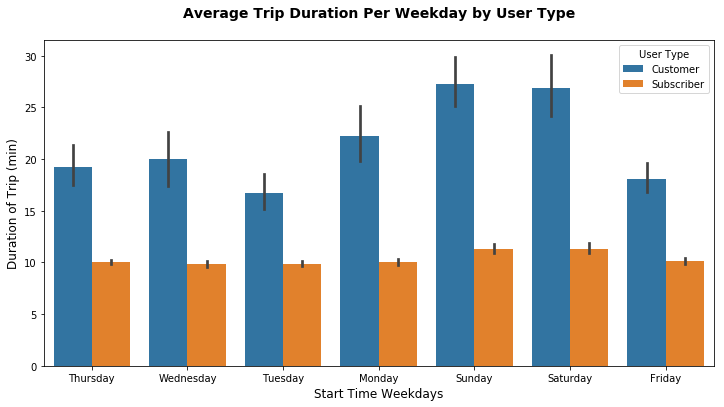

In [9]:
plt.figure(figsize=[12,6])
sb.barplot(data = df, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type')
plt.legend(title = 'User Type');
displayChartLabels(title='Average Trip Duration Per Weekday by User Type', 
                   xlabel='Start Time Weekdays', 
                   ylabel='Duration of Trip (min)')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 409633 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
